# Analysis of the results of the seq2seq models

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## compare preprocessing performance
- using word tokenizer (wtokenizer) o tweet tokenizer (ttokenizer)
- using embeddings and no embeddings

In [4]:
from scipy.interpolate import splrep, splev

def smooth_curve(x, y, smooth=0.1):
    bspl = splrep(x,y,s=smooth)
    bspl_y = splev(x,bspl)
    return x, bspl_y

In [26]:
v1d1_eval_loss =pd.read_csv('../results/twconvrsu_v1d1-eval-loss.csv')
v1d1_training_loss = pd.read_csv('../results/twconvrsu_v1d1-training-loss.csv')
v1d1p2_eval_loss =pd.read_csv('../results/twconvrsu_v1d1p2-eval-loss.csv')
v1d1p2_training_loss = pd.read_csv('../results/twconvrsu_v1d1p2-training-loss.csv')

v1d2_eval_loss =pd.read_csv('../results/twconvrsu_v1d2-eval-loss.csv')
v1d2_training_loss = pd.read_csv('../results/twconvrsu_v1d2-training-loss.csv')
v1d2p2_eval_loss =pd.read_csv('../results/twconvrsu_v1d2p2-eval-loss.csv')
v1d2p2_training_loss = pd.read_csv('../results/twconvrsu_v1d2p2-training-loss.csv')

In [28]:
v1d1_recall =pd.read_csv('../results/twconvrsu_v1d1-eval-recall_at_1.csv')
v1d1p2_recall =pd.read_csv('../results/twconvrsu_v1d1p2-eval-recall_at_1.csv')
v1d2_recall =pd.read_csv('../results/twconvrsu_v1d2-eval-recall_at_1.csv')
v1d2p2_recall =pd.read_csv('../results/twconvrsu_v1d2p2-eval-recall_at_1.csv')


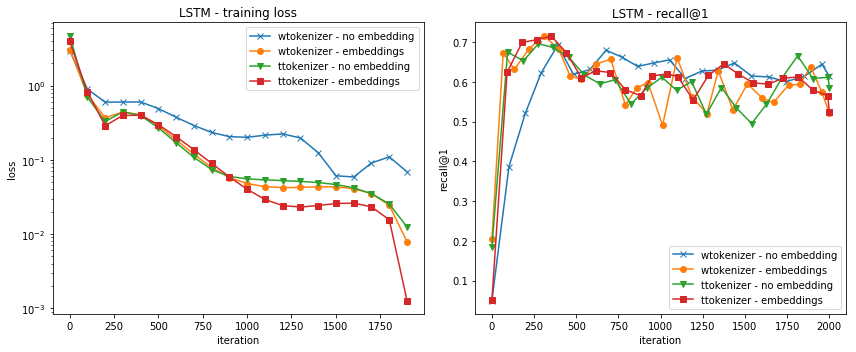

In [36]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)

x, y = smooth_curve(v1d1_training_loss.Step, v1d1_training_loss.Value)
plt.plot(x, y, marker='x')

x, y = smooth_curve(v1d1p2_training_loss.Step, v1d1p2_training_loss.Value)
plt.plot(x, y, marker='o')

x, y = smooth_curve(v1d2_training_loss.Step, v1d2_training_loss.Value)
plt.plot(x, y, marker='v')

x, y = smooth_curve(v1d2p2_training_loss.Step, v1d2p2_training_loss.Value)
plt.plot(x, y, marker='s')

plt.yscale('log')
plt.title('LSTM - training loss')
plt.legend([
    'wtokenizer - no embedding', 
    'wtokenizer - embeddings',
    'ttokenizer - no embedding', 
    'ttokenizer - embeddings'])

plt.ylabel('loss')
plt.xlabel('iteration')

plt.subplot(1,2,2)

x, y = smooth_curve(v1d1_recall.Step, v1d1_recall.Value,0)
plt.plot(x, y, marker='x')

x, y = smooth_curve(v1d1p2_recall.Step, v1d1p2_recall.Value,0)
plt.plot(x, y, marker='o')

x, y = smooth_curve(v1d2_recall.Step, v1d2_recall.Value,0)
plt.plot(x, y, marker='v')

x, y = smooth_curve(v1d2p2_recall.Step, v1d2p2_recall.Value,0)
plt.plot(x, y, marker='s')

#plt.yscale('log')
plt.title('LSTM - recall@1')
plt.legend([
    'wtokenizer - no embedding', 
    'wtokenizer - embeddings',
    'ttokenizer - no embedding', 
    'ttokenizer - embeddings'])

plt.ylabel('recall@1')
plt.xlabel('iteration')

plt.tight_layout()
plt.savefig('../results/preprocessing_perf.eps', format='eps')

- best is tweet tokenizer with embeddings, although 2k iterations seems to be an early stopping as all curves are still decreasing
- not conclusive the performance at recall@1

## updating embeddings or not

In [30]:
v1d2p3_training_loss = pd.read_csv('../results/twconvrsu_v1d2p3-nweu-training-loss.csv')
v1d2p3_recall =pd.read_csv('../results/twconvrsu_v1d2p3-nweu-eval-recall_at_1.csv')

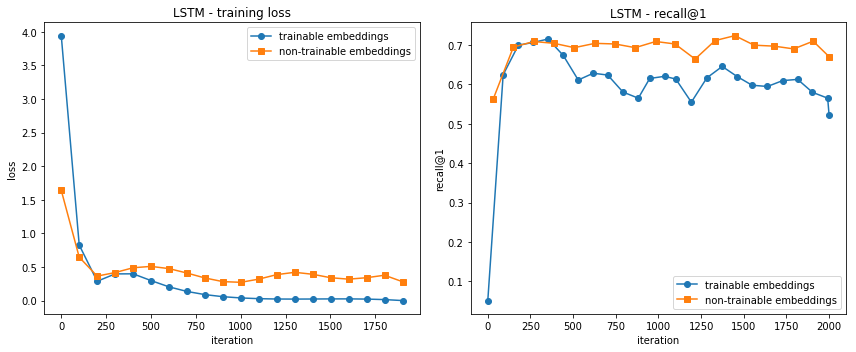

In [31]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)

x, y = smooth_curve(v1d2p2_training_loss.Step, v1d2p2_training_loss.Value)
plt.plot(x, y, marker='o')

x, y = smooth_curve(v1d2p3_training_loss.Step, v1d2p3_training_loss.Value)
plt.plot(x, y, marker='s')

#plt.yscale('log')
plt.title('LSTM - training loss')
plt.legend([
    'trainable embeddings', 
    'non-trainable embeddings'
])

plt.ylabel('loss')
plt.xlabel('iteration')

plt.subplot(1,2,2)

x, y = smooth_curve(v1d2p2_recall.Step, v1d2p2_recall.Value,0)
plt.plot(x, y, marker='o')

x, y = smooth_curve(v1d2p3_recall.Step, v1d2p3_recall.Value,0)
plt.plot(x, y, marker='s')

#plt.yscale('log')
plt.title('LSTM - recall@1')
plt.legend([
    'trainable embeddings', 
    'non-trainable embeddings'
])

plt.ylabel('recall@1')
plt.xlabel('iteration')

plt.tight_layout()
plt.savefig('../results/trainable_embeddings_perf.eps', format='eps')

## compare models performance
using the best preprocessing (in the paper reported just a table)

## number of tweets in timelines
compare best model performace respecto to the number of tweets in timelines of participating users

## number of training instances
compare best model performace respecto to the number of training instances used


In [22]:
v1d2i10k_training_loss = pd.read_csv('../results/twconvrsu_v1d2i_10k-training-loss.csv')
v1d2i10k_recall =pd.read_csv('../results/twconvrsu_v1d2i_10k-eval-tag-recall_at_1.csv')

v1d2i20k_training_loss = pd.read_csv('../results/twconvrsu_v1d2i_20k-training-tag-loss.csv')
v1d2i20k_recall =pd.read_csv('../results/twconvrsu_v1d2i_20k-eval-tag-recall_at_1.csv')

v1d2i50k_training_loss = pd.read_csv('../results/twconvrsu-v1d2p3-nweu-training-loss.csv')
v1d2i50k_recall =pd.read_csv('../results/twconvrsu-v1d2p3-nweu-eval-recall_at_1.csv')

v1d2i60k_training_loss = pd.read_csv('../results/twconvrsu_v1d2i_60k-training-tag-loss.csv')
v1d2i60k_recall =pd.read_csv('../results/twconvrsu_v1d2i_60k-eval-tag-recall_at_1.csv')


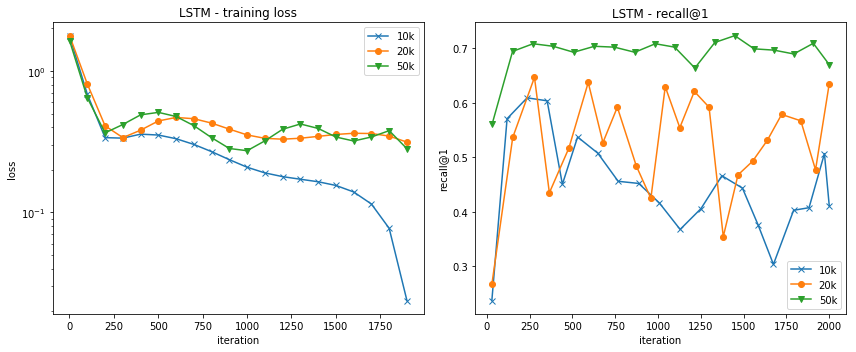

In [32]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)

x, y = smooth_curve(v1d2i10k_training_loss.Step, v1d2i10k_training_loss.Value)
plt.plot(x, y, marker='x')

x, y = smooth_curve(v1d2i20k_training_loss.Step, v1d2i20k_training_loss.Value)
plt.plot(x, y, marker='o')

x, y = smooth_curve(v1d2i50k_training_loss.Step, v1d2i50k_training_loss.Value)
plt.plot(x, y, marker='v')

# x, y = smooth_curve(v1d2i60k_training_loss.Step, v1d2i60k_training_loss.Value)
# plt.plot(x, y, marker='s')

plt.yscale('log')
plt.title('LSTM - training loss')
plt.legend([
    '10k', 
    '20k',
    '50k', 
    #'60k'
])

plt.ylabel('loss')
plt.xlabel('iteration')

plt.subplot(1,2,2)

x, y = smooth_curve(v1d2i10k_recall.Step, v1d2i10k_recall.Value,0)
plt.plot(x, y, marker='x')

x, y = smooth_curve(v1d2i20k_recall.Step, v1d2i20k_recall.Value,0)
plt.plot(x, y, marker='o')

x, y = smooth_curve(v1d2i50k_recall.Step, v1d2i50k_recall.Value,0)
plt.plot(x, y, marker='v')

# x, y = smooth_curve(v1d2i60k_recall.Step, v1d2i60k_recall.Value,0)
# plt.plot(x, y, marker='s')

#plt.yscale('log')
plt.title('LSTM - recall@1')
plt.legend([
    '10k', 
    '20k',
    '50k', 
    #'60k'
])

plt.ylabel('recall@1')
plt.xlabel('iteration')


plt.tight_layout()
plt.savefig('../results/training_instances_perf.eps', format='eps')

training lost is best for 10k but it means that it'll probably overfit , as it 's shown in the recall@1 where best performance is with more data